In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv("UpdatedResumeDataSet.csv")
df.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [17]:
df.shape

(962, 2)

In [18]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\Tan\AppData\Local\Temp\ipykernel_17264\1570755018.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Category', palette=palette)


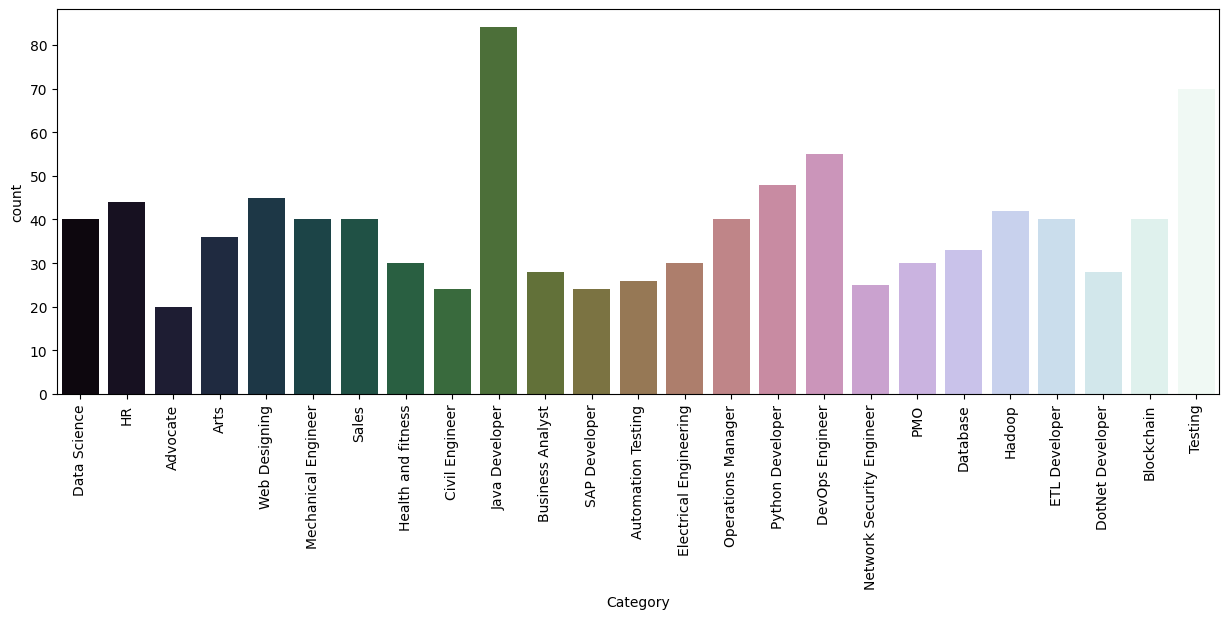

In [19]:
plt.figure(figsize=(15,5))
palette = sns.color_palette("cubehelix", 25)
sns.countplot(data=df, x='Category', palette=palette)
plt.xticks(rotation=90)
plt.show()

([<matplotlib.patches.Wedge at 0x27b065d5e50>,
 [Text(1.058871228953308, 0.29797939609125923, 'Data Science'),
  Text(0.7841417468169058, 0.7714413269322118, 'HR'),
  Text(0.4134731563409379, 1.0193330903024107, 'Advocate'),
  Text(0.053862331076050214, 1.098680503736666, 'Arts'),
  Text(-0.2771758554020645, 1.0645062447830609, 'Web Designing'),
  Text(-0.5706079161115722, 0.9404289479119671, 'Mechanical Engineer'),
  Text(-0.8089120262381768, 0.7454269473310228, 'Sales'),
  Text(-0.9773196261993998, 0.5048230860860717, 'Health and fitness'),
  Text(-1.0745482070561094, 0.23525762625789806, 'Civil Engineer'),
  Text(-1.0988505454600117, -0.05027403646252011, 'Java Developer'),
  Text(-1.0485773173407904, -0.3323937567981556, 'Business Analyst'),
  Text(-0.9271404102234844, -0.5919549473825093, 'SAP Developer'),
  Text(-0.7427813690411197, -0.811341998053472, 'Automation Testing'),
  Text(-0.5207132389301881, -0.9689467079271352, 'Electrical Engineering'),
  Text(-0.291057286964679, -1.

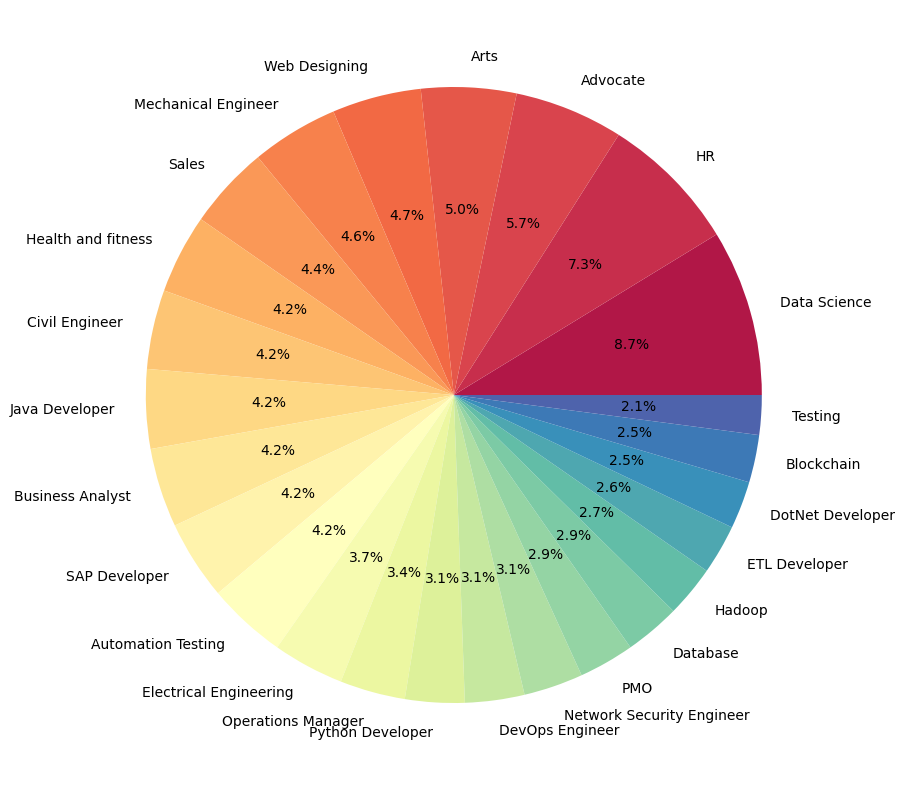

In [20]:
count = df['Category'].value_counts()
labels = df['Category'].unique()

plt.figure(figsize=(15,10))
palette = sns.color_palette("Spectral", 25)
plt.pie(count,labels=labels, autopct='%1.1f%%', colors=palette)

### Cleaning Data

In [21]:
# Checking data
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [22]:
import re
def cleaning(txt):
    cleantxt = re.sub(r'http\S+\s',' ',txt)
    cleantxt = re.sub(r'RT|cc', ' ', cleantxt)
    cleantxt = re.sub(r'#\S+\s', ' ', cleantxt)
    cleantxt = re.sub(r'@\S+', '  ', cleantxt)  
    special_chars = r'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~' 
    cleantxt = re.sub(r'[%s]' % re.escape(special_chars), ' ', cleantxt)
    cleantxt = re.sub(r'[^\x00-\x7f]', ' ', cleantxt) 
    cleantxt = re.sub(r'\s+', ' ', cleantxt)
    
    return  cleantxt

In [23]:
df['Resume'] = df['Resume'].apply(lambda x: cleaning(x))

# Checking data after cleaning
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

#### Encoder for category value

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [25]:
le.fit(df['Category'])
df['Category_value'] = le.transform(df['Category'])

In [27]:
print(df['Category'].unique())
print(df['Category_value'].unique())

['Data Science' 'HR' 'Advocate' 'Arts' 'Web Designing'
 'Mechanical Engineer' 'Sales' 'Health and fitness' 'Civil Engineer'
 'Java Developer' 'Business Analyst' 'SAP Developer' 'Automation Testing'
 'Electrical Engineering' 'Operations Manager' 'Python Developer'
 'DevOps Engineer' 'Network Security Engineer' 'PMO' 'Database' 'Hadoop'
 'ETL Developer' 'DotNet Developer' 'Blockchain' 'Testing']
[ 6 12  0  1 24 16 22 14  5 15  4 21  2 11 18 20  8 17 19  7 13 10  9  3
 23]


#### Vactorization

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
requiredtxt = tfidf.transform(df['Resume'])

#### Splitting

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train, X_test, y_train, y_test =  train_test_split(requiredtxt,df['Category_value'], test_size=0.2, random_state=42)

In [33]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(769, 7351) (193, 7351) (769,) (193,)


### Fitting model

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train,y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [37]:
y_pred = model.predict(X_test)
print(y_pred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


### Evaluation

In [39]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(model, open('clf.pkl', 'wb'))

In [40]:
myresume = """Thanakorn Phumkuea
Experienced Data Scientist with a strong background in machine learning, deep learning, and data-driven solutions. Skilled in utilizing Python, TensorFlow, Scikit-Learn, and Keras for developing advanced models and algorithms. Published researcher with a track record of achieving high accuracy in medical image classification. Dedicated to leveraging data to solve complex problems and drive impactful decision-making. Passionate about exploring innovative AI/ML techniques and contributing to the advancement of the field.
(+66) 93 578 6450 · TanThanakorn_2541@hotmail.com · Linkedin.com/in/thanakorn-phumkuea · Birth Date: 22 May 1998
Skills
Programming Languages: Python, JavaScript, HTML, CSS
Machine Learning: Scikit-Learn, TensorFlow, Keras
Image Processing: OpenCV
Database Management: SQL, MongoDB (NoSQL)
Big Data and Cloud Computing: Apache Spark, AWS
Version Control: Git
solving and Analytical Skills
Data Visualization: Matplotlib, Seaborn, Tableau
Deep Learning: Convolutional Neural Networks (CNN), Recurrent Neural Networks (RNN)
Data Analysis: pandas, NumPy, Pyspark
Web Development: Django, Vue.js
Languages: Thai (Native), English (Intermediate, TOEIC score: 680)
Education
Master of Science in Data Science 2020 - 2023
Prince of Songkla University, Songkhla, Thailand
GPA: 3.91
Bachelor of Science in Information and Communication Technology 2016 - 2019
Prince of Songkla University, Songkhla, Thailand
GPA: 3.04
Work Experience
Data Science Student July 2020 - June 2023
Prince of Songkla University, Songkhla, Thailand
•
Led the development of a Deep Learning (CNN) and Machine Learning (Decision Tree, SVM and ANN) model achieving highest 97.30% accuracy in classifying COVID-19 from chest X-ray images, enabling scalable automated classification.
•
Implemented Machine Learning (Decision Tree) models for malaria cell image classification with 95.60% accuracy, reducing diagnostic errors.
•
Developed a web-based application for COVID-19 classification using Django and Nginx, improving accessibility to medical professionals.
•
Utilized Python, Scikit-Learn, TensorFlow, and Keras for data manipulation, analysis, and model building.
•
Conducted data visualization using Matplotlib, Seaborn, and Tableau to communicate insights effectively.
•
Drafted, wrote, and published papers detailing the developed methodologies in international journals.
Certifications
Linear Algebra for Machine Learning & Data Science
Coursera
Machine Learning, Data Science and Generative AI with Python
Udemy
Spark and Python for Big Data with PySpark
Udemy
Tableau Data Analyst Certification Prep 2024
Udemy
Publications
1. Classifying COVID-19 Patients from Chest X-ray Images Using Hybrid Machine Learning Techniques: Development and Evaluation
•
Journal Name: JMIR Formative Research
•
DOI: 10.2196/42324
2. A New Computer-Aided Diagnosis of Precise Malaria Parasite Detection in Microscopic Images Using a Decision Tree Model with Selective Optimal Features
•
Journal Name: Biomedical Engineering: Applications, Basis and Communications
•
DOI: 10.4015/S1016237223500047
3. MSTAC: A Multi-Stage Automated Classification of COVID-19 Chest X-ray Images Using Stacked CNN Models
•
Journal Name: Tomography
•
DOI: 10.3390/tomography9060173
Projects
Food Retail Customer Analysis
•
Conducted data cleansing, visualization, and exploratory data analysis (EDA) for customer segmentation using RFM analysis.
•
GitHub Repository: https://github.com/tanthanakorn2541/Food_Retail_Customer_Analysis
Deep Learning for COVID-19 Chest X-ray Images Using Stacked CNN Models
•
This project focuses on the classification of COVID-19 cases using the stacking two deep learning models. The project is developed in Python and utilizes libraries such as TensorFlow, scikit-learn, and others for data processing, model creation, evaluation, and model saving.
•
GitHub Repository: https://github.com/tanthanakorn2541/MSTAC_Deep_Learning_COVID19
COVID-19 CXR Classification Web Application
•
This web application (Django) is designed for classifying Chest X-Ray (CXR) images to identify potential cases of COVID-19. The application utilizes deep learning models trained on a dataset of CXR images to provide predictions with high accuracy.
•
GitHub Repository: https://github.com/tanthanakorn2541/ covid19-cxr-classification-web

Publications
1. Classifying COVID-19 Patients from Chest X-ray Images Using Hybrid Machine Learning Techniques: Development and Evaluation
•
Journal Name: JMIR Formative Research
•
DOI: 10.2196/42324
2. A New Computer-Aided Diagnosis of Precise Malaria Parasite Detection in Microscopic Images Using a Decision Tree Model with Selective Optimal Features
•
Journal Name: Biomedical Engineering: Applications, Basis and Communications
•
DOI: 10.4015/S1016237223500047
3. MSTAC: A Multi-Stage Automated Classification of COVID-19 Chest X-ray Images Using Stacked CNN Models
•
Journal Name: Tomography
•
DOI: 10.3390/tomography9060173
"""

In [42]:
# Load the trained classifier
clf = pickle.load(open('clf.pkl', 'rb'))

# Clean the input resume
cleaned_resume = cleaning(myresume)

# Transform the cleaned resume using the trained TfidfVectorizer
input_features = tfidf.transform([cleaned_resume])

# Make the prediction using the loaded classifier
prediction_id = clf.predict(input_features)[0]

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)
print(prediction_id)

Predicted Category: Data Science
6
